# TREE DECISION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [29]:
import sys

import sys  
sys.path.insert(0, '../../scripts/')

import eda_tools

## Data

In [20]:
# Model 1 -> Lasso selected variables
full_train = pd.read_csv("../../data/csev/model_1/trainCSEV.csv")
full_test = pd.read_csv("../../data/csev/model_1/testCSEV.csv")

In [21]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

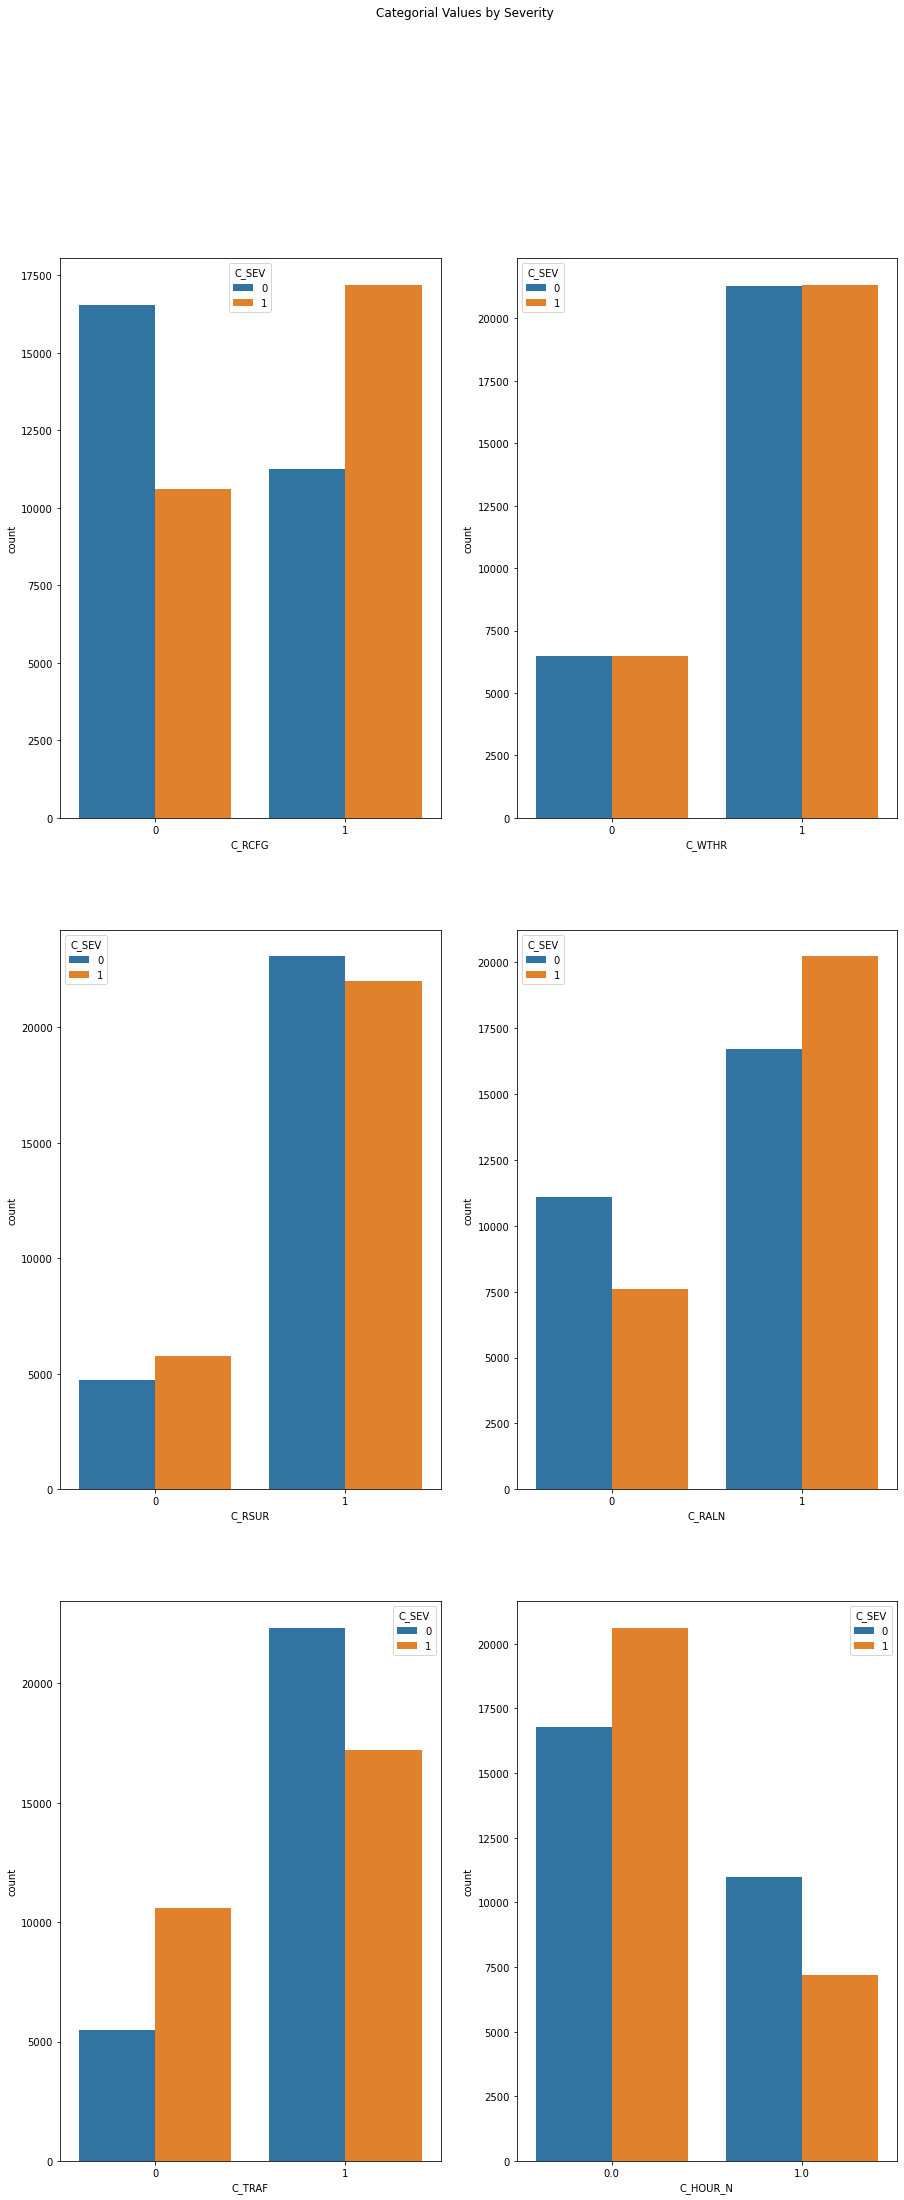

In [34]:
categorical = ['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF','C_HOUR_N']

XY_train = X_train.copy()
XY_train['C_SEV'] = Y_train

fig, axes = plt.subplots(3, 2, figsize=(15, 35), sharey=False)
fig.suptitle('Categorial Values by Severity')

i = 0
j = 0
for cat in categorical:
    sns.countplot(data = XY_train, x = cat, hue = 'C_SEV', ax = axes[i,j]);
    if (j == 0): 
        j = 1
    else:
        j = 0
        i += 1

In [36]:
X_train = X_train.drop(['C_WTHR'], axis=1)

KeyError: "['C_WTHR'] not found in axis"

In [22]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

In [41]:
X_test = X_test.drop(['C_WTHR'], axis=1)

## Tree

In [42]:
treeModel = DecisionTreeClassifier(random_state=0)

In [43]:
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
Y_pred = treeModel.predict(X_test)

## Evaluation

In [45]:
metrics.accuracy_score(Y_test, Y_pred)

0.7774290118630057

Matriz de confusión
[[  3032   3917]
 [ 75783 275356]]
Matriz de confusión normalizada
[[0.43632177 0.56367823]
 [0.21582052 0.78417948]]


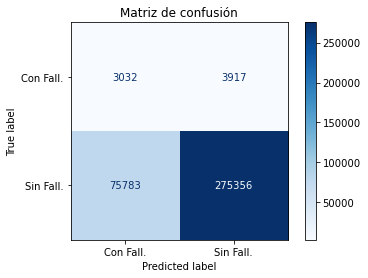

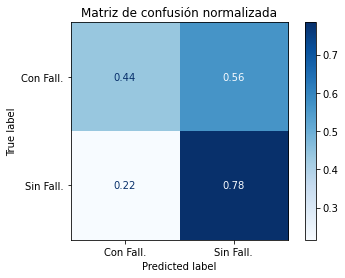

In [46]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        treeModel,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.03      0.34      0.06      6949
           1       0.98      0.80      0.88    351139

    accuracy                           0.79    358088
   macro avg       0.51      0.57      0.47    358088
weighted avg       0.97      0.79      0.87    358088

